<div class="alert alert-success">
     <b>  </b>
   
## LAB SUBMISSION Unsupervised learning: Clustering. Detect suspicious consumptions from households.  
    
    
    
Important Information:

* This lab report must be completed **individually**.
* Please upload your completed report to Atenea.
* You have until 9th january to submit the report.
</div>


**Objective**: The goal of this exercise is to identify households with atypical or suspicious consumption patterns compared to other users. These unusual patterns may not always indicate fraud but could be linked to system malfunctions (e.g., water leaks in toilets causing abnormally high water usage) or discrepancies such as a higher actual number of residents than recorded.

By detecting these anomalies, we aim to uncover potential issues and inefficiencies, allowing for timely interventions. The objective is to develop a clustering model to identify households exhibiting these atypical consumption behaviors. Analyze the results to determine which features contribute most to the detection of anomalies.



**Dataset Description**

The dataset is located in: **``Data/ Labsubmission_suspicious_consumption_dataset.xlsx``**

This shyntetic dataset for identifying suspicious consumption patterns in households includes the following features:

* ``Household_ID``: Unique identifier for each household.
* ``Daily_Electricity_kWh``: Daily electricity consumption in kWh.
* ``Daily_Water_Liters``: Daily water consumption in liters.
* ``Daily_Gas_CubicMeters``: Daily gas consumption in cubic meters.
* ``Num_Residents``: Number of residents in the household.
* ``Temperature_C``: Average daily temperature in Celsius.
* ``Humidity_Percent``: Average daily humidity in percentage.







# Import libraries

In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")


# Load dataset

In [500]:
df = pd.read_excel('Data/Labsubmission_suspicious_consumption_dataset.xlsx')

In [501]:
df

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
0,1,34.967142,219.967772,3.649643,4,19.381337,29.826612
1,2,28.617357,196.231684,4.710963,2,22.289028,21.676741
2,3,36.476885,152.981518,3.415160,1,17.515340,58.139809
3,4,45.230299,117.653161,4.384077,2,19.087155,51.286175
4,5,27.658466,184.911166,1.212771,5,15.050211,47.743436
...,...,...,...,...,...,...,...
995,996,27.188997,203.507512,5.154961,1,24.188821,52.984518
996,997,47.976865,148.673937,5.515505,4,16.603847,42.174014
997,998,107.373052,401.905625,12.323095,3,5.428720,57.070324
998,999,24.288210,141.846652,5.668353,1,22.616116,70.847129


# **1. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

* How many households are in the dataset? How many attributes has each household?  
* Is there any missing data? 
* Statistical summary of the input data set (Statistics Table)


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

How many households that the dataset have? How many features there are? 
    
</div>


In [502]:
#household count
df.shape

(1000, 7)

In [503]:
df.size

7000

In [504]:
#number of attributes
df.columns 

Index(['Household_ID', 'Daily_Electricity_kWh', 'Daily_Water_Liters',
       'Daily_Gas_CubicMeters', 'Num_Residents', 'Temperature_C',
       'Humidity_Percent'],
      dtype='object')

In [505]:
#missing data investigation within the dataset
df.isna()

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Is there any missing data?
    
</div>

In [506]:
#exploring the missing data
df.isna().sum()

Household_ID             0
Daily_Electricity_kWh    0
Daily_Water_Liters       0
Daily_Gas_CubicMeters    0
Num_Residents            0
Temperature_C            0
Humidity_Percent         0
dtype: int64

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Statistical summary of the data set. 
    
</div>


In [507]:
#statistical summary
df.describe()

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,37.420246,191.867931,6.199373,3.055000,19.684060,49.840213
std,288.819436,27.322164,143.810457,4.658273,1.398546,4.931097,9.854691
min,1.000000,-2.412673,2.980568,-1.039024,1.000000,4.961838,18.232962
25%,250.750000,24.371303,123.501764,3.857672,2.000000,16.424893,43.431399
50%,500.500000,31.520594,159.724794,5.315209,3.000000,19.827668,49.800535
75%,750.250000,39.175583,200.650271,6.776582,4.000000,22.927253,56.523122
max,1000.000000,253.381810,1146.323523,34.284502,5.000000,36.215465,81.129102


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Set the household_ID as the index
    
</div>

In [508]:
#setting the index
df.set_index('Household_ID', inplace= True)

In [509]:
#dataset with index
df.head()

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612
2,28.617357,196.231684,4.710963,2,22.289028,21.676741
3,36.476885,152.981518,3.415160,1,17.515340,58.139809
4,45.230299,117.653161,4.384077,2,19.087155,51.286175
5,27.658466,184.911166,1.212771,5,15.050211,47.743436


# **2. Visualize the data**.

A visual way to understand the input data. 
* Histogram
* Density curve
* Boxplots
* Scatter plots
* Correlation matrix

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Plot the histogram of each feature  
</div>

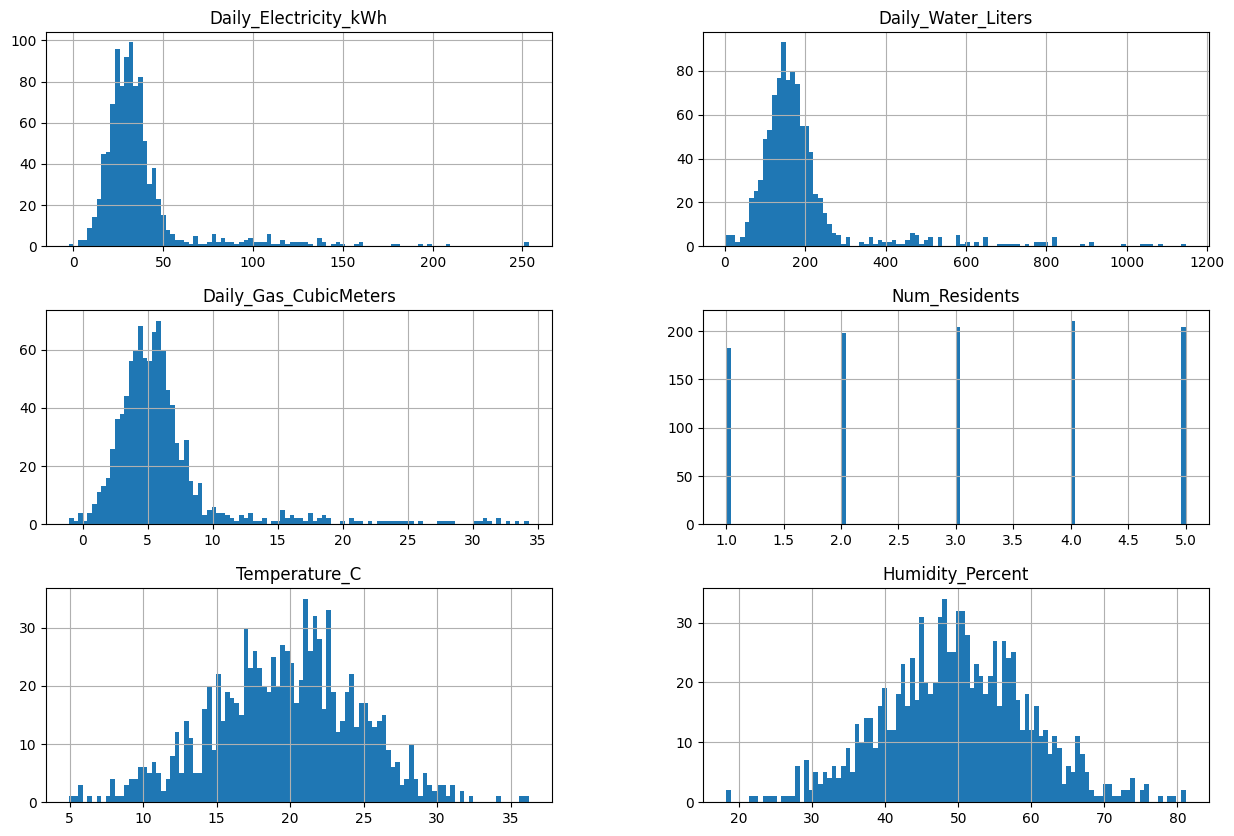

In [510]:
Histogram = df.loc[:,].hist(figsize= (15,10), bins= 100)

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Plot the density plot of each feature   
</div>

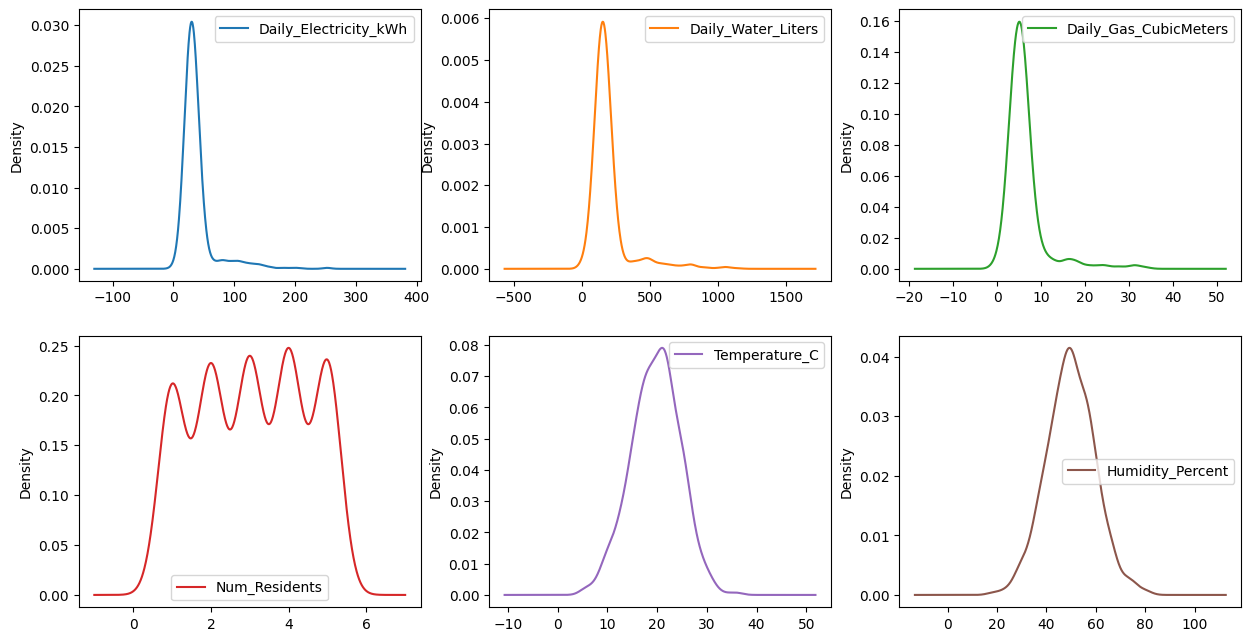

In [511]:

df.plot(kind='density', subplots=True, legend=True, layout=(3, 3), figsize=(15, 12), sharex=False)
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Boxplot of each feature. Should we delete the outliers?
</div>

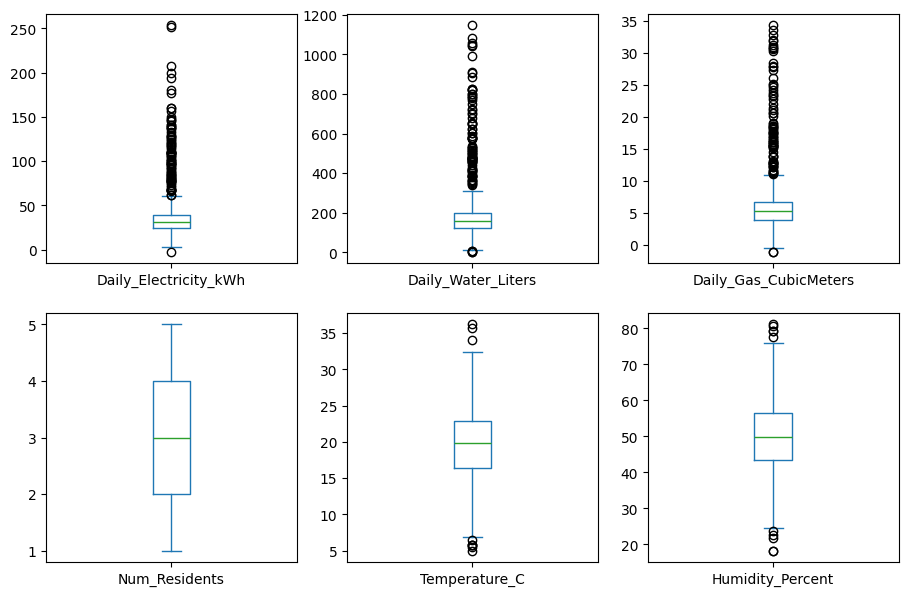

In [512]:
boxplot = df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(11, 11),
                                 sharex=False, sharey=False, fontsize=10)

In the dataset the outliers must be the suspicious consumption. Removing the outliers also means deleting the suspicious consumption. Hence, it is reasonable to leave the outliers as it is. Moreover, we can use IQR method and z-score method method to remove the outliers if it is necessary. Since it is not the case, we will neglect it.

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Multivariate plot: Scatter plot 
</div>

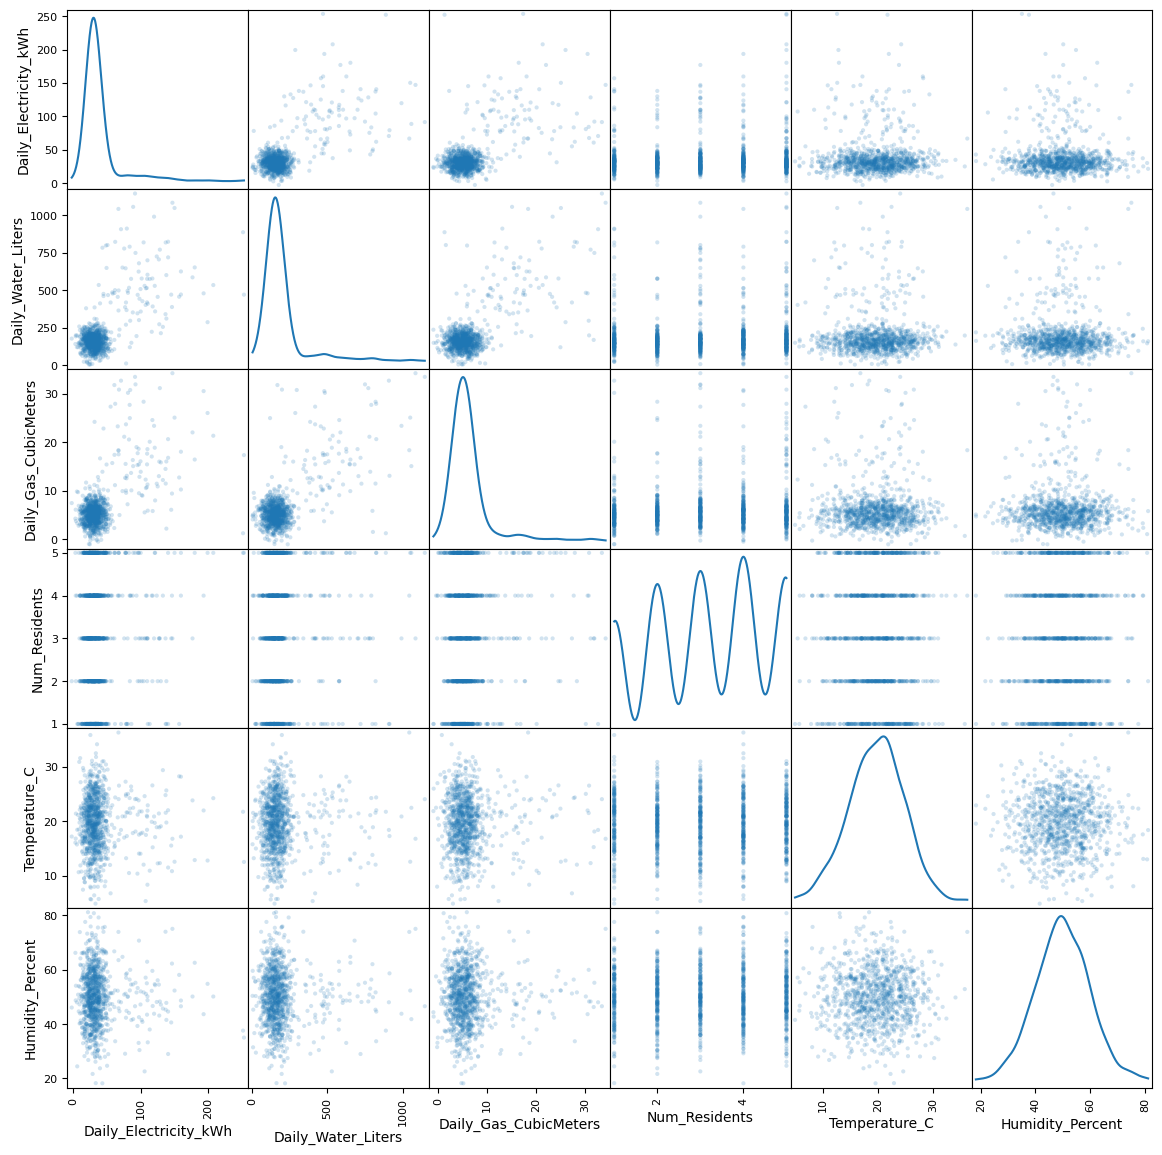

In [513]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(14,14), diagonal='kde', range_padding = 0.05)
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Multivariate plot: Correlation matrix.
</div>

In [514]:
# calculate the correlation matrix

corr = df.iloc[:,0:].corr(method='spearman')
corr



,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Daily_Electricity_kWh,1.000000,0.201143,0.247923,0.054537,0.014669,-0.019243
Daily_Water_Liters,0.201143,1.000000,0.205673,0.075677,0.029361,-0.034812
Daily_Gas_CubicMeters,0.247923,0.205673,1.000000,0.061363,-0.010763,-0.013254
Num_Residents,0.054537,0.075677,0.061363,1.000000,0.008012,0.012307
Temperature_C,0.014669,0.029361,-0.010763,0.008012,1.000000,-0.001034
Humidity_Percent,-0.019243,-0.034812,-0.013254,0.012307,-0.001034,1.000000


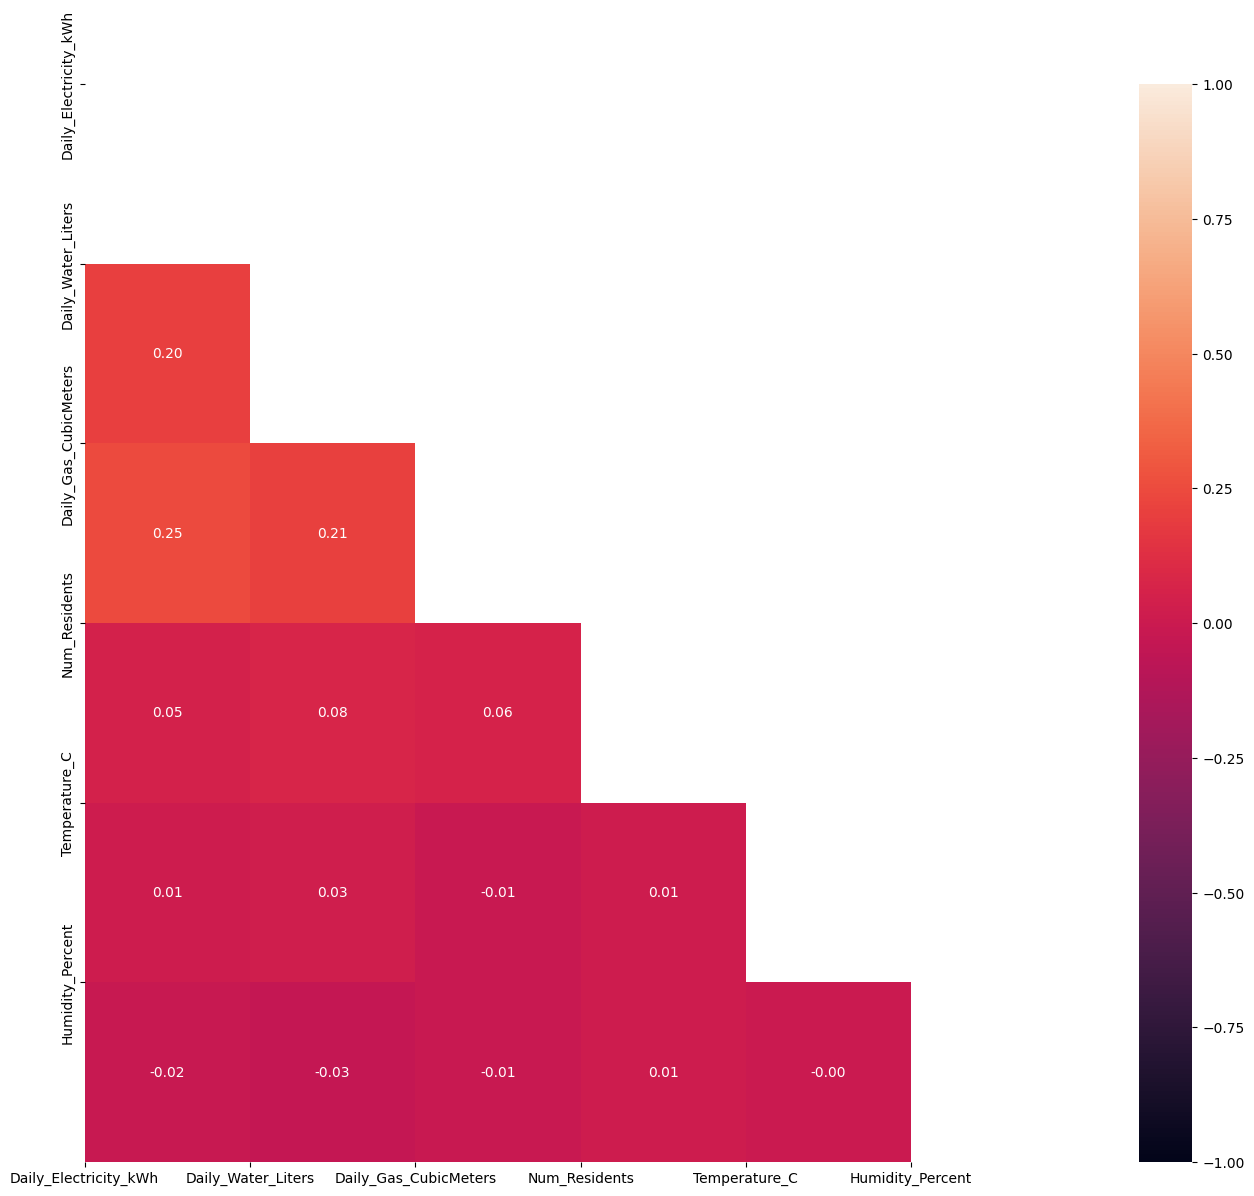

In [515]:
# plot the correlation matrix 
import seaborn as sns
import numpy as np

mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()


# 3. **Prepare the data.**

* Take care of missing data (if necessary)
* Scale the data


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Take care of missing data (if necessary)
</div>

<Axes: >

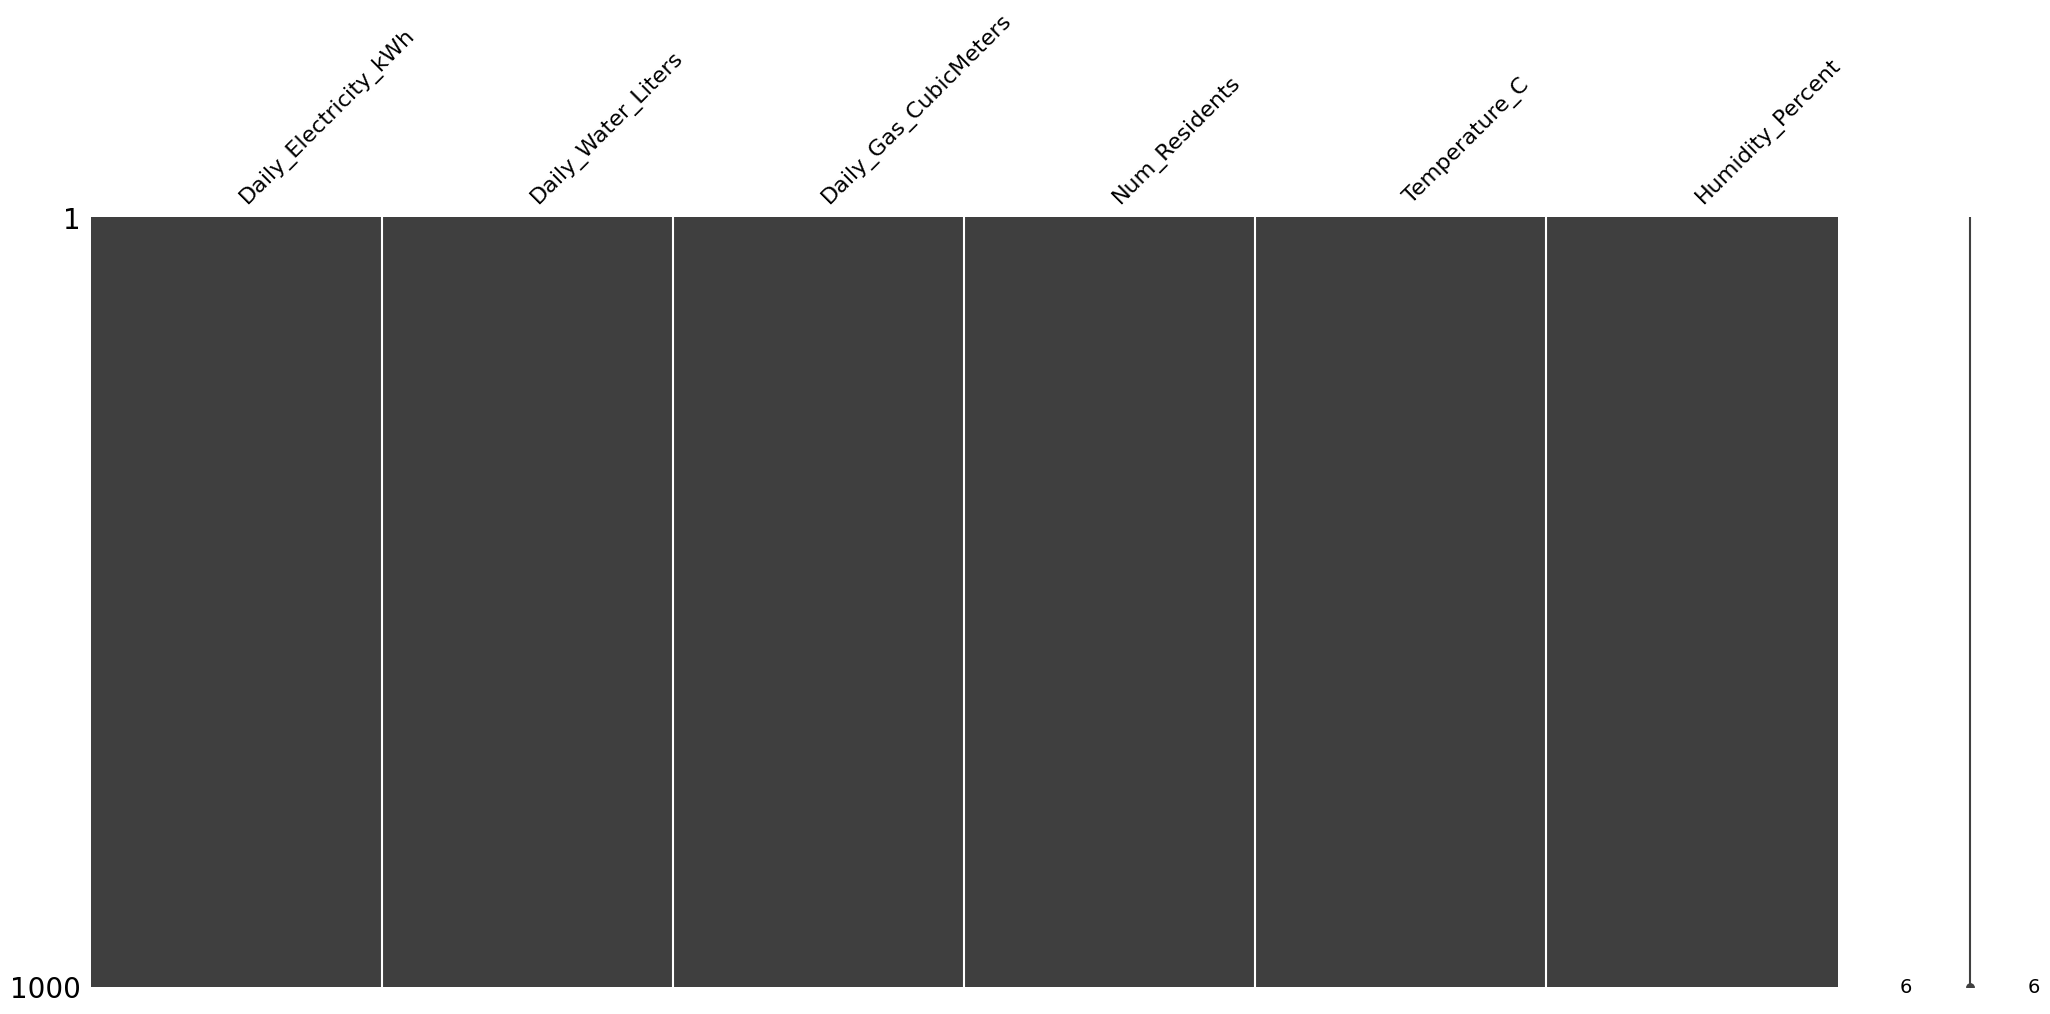

In [516]:
import missingno as msno
msno.matrix(df)


There is no missing data therefore we skip without making any changes. If there is any missing data we can clean it using dropna() method.

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Scale the data using StandardScaler()
</div>

In [517]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
new_data_scaled = Scaler.fit_transform(df)


In [518]:
new_data_scaled

array([[-0.08982935,  0.19549275, -0.54762907,  0.67603987, -0.06142131,
        -2.03188674],
       [-0.3223498 ,  0.03035897, -0.31967972, -0.75473234,  0.52853792,
        -2.85930482],
       [-0.03454459, -0.27053575, -0.59799122, -1.47011844, -0.44002475,
         0.8426189 ],
       ...,
       [ 2.56157635,  1.46124835,  1.31524839, -0.03934624, -2.89235265,
         0.73403912],
       [-0.48087726, -0.34800187, -0.11405218, -1.47011844,  0.59490277,
         2.13273337],
       [-0.06204729, -0.55039565, -0.32429334, -0.03934624, -1.17388841,
        -1.00706289]])

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Dimensionality reduction with PCA: Reduce the scaled dataset to 2 principal components and plot them on a 2D graph.
</div>

In [519]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
results_pca = pca.fit_transform(new_data_scaled)
results_pca


array([[-0.15448712, -1.19625805],
       [-0.40846319, -2.6529965 ],
       [-0.68526015, -0.24141834],
       ...,
       [ 3.0631933 ,  0.12151972],
       [-0.72676747,  0.87949027],
       [-0.53012821, -0.88047627]])

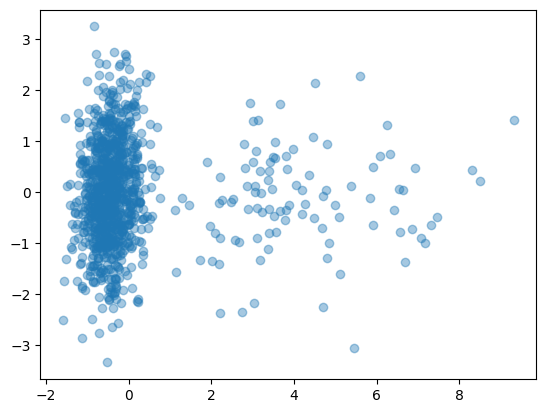

In [520]:
# Visualize the principal components in a plot
plt.scatter(results_pca[:,0], results_pca[:,1], alpha=0.4)
plt.show()

# 4. Unsupervised Learning Model Building: Houses Clustering using K-means

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Find the optimal number of clusters using the Elbow method
</div>

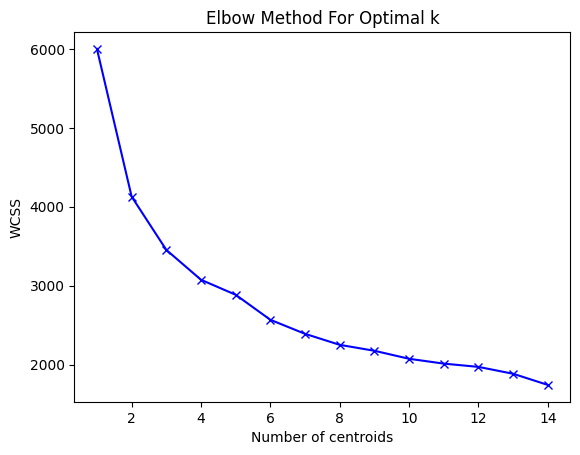

In [521]:
# Elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, random_state= 42)
    km = km.fit(new_data_scaled)
    wcss.append(km.inertia_)
    


# Plot the Elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Use K-means to find the cluster for each household
</div>

In [522]:
# Train the K-means for the optimal number of clusters given the result of the Elbow method.
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(new_data_scaled)
clusters = pd.Series(y_kmeans)
clusters

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    1
999    1
Length: 1000, dtype: int32

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Print the clusters labels
</div>

In [523]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Visualize the K-Means Clustering results obtained before on the PCA Components plot. 
</div>

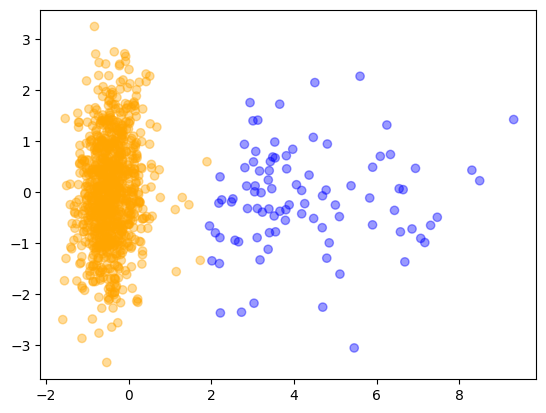

In [524]:
# Visualize K-Means Clustering on PCA Components (each data point should be color according to the cluster labels)
cluster_values = sorted(clusters.unique())
cluster_values

from sklearn.decomposition import PCA
import matplotlib.colors
colorslist = ['blue','red','yellow','green','orange']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, colorslist)

plt.scatter(results_pca[:,0], results_pca[:,1], c=clusters, cmap= cmap, alpha=0.4)
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
    Add cluster labels back to the original dataset (create a new column named "cluster" in the original dataset)
</div>

In [525]:
# Add cluster labels to the original dataset (create a new column)
df ['cluster'] = y_kmeans
df 

#COMMENT: The cluster column is at the end of the Table


,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent,cluster
Household_ID,,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612,1
2,28.617357,196.231684,4.710963,2,22.289028,21.676741,1
3,36.476885,152.981518,3.415160,1,17.515340,58.139809,1
4,45.230299,117.653161,4.384077,2,19.087155,51.286175,1
5,27.658466,184.911166,1.212771,5,15.050211,47.743436,1
...,...,...,...,...,...,...,...
996,27.188997,203.507512,5.154961,1,24.188821,52.984518,1
997,47.976865,148.673937,5.515505,4,16.603847,42.174014,1
998,107.373052,401.905625,12.323095,3,5.428720,57.070324,0


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Group the data by cluster label (.groupby('cluster')) and compute the mean values (.mean()). and store that into a DataFrame that displays the mean values of each feature for clusters labeled as 0 and 1.
</div>




In [526]:
#grouping clusters and finding their means
mean_value = df.groupby('cluster').mean()

#clusters 0 and 1
Stored_cluster_mean = mean_value.loc[[0,1]]
Stored_cluster_mean


,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
cluster,,,,,,
0,105.794123,553.348417,17.219082,3.387097,19.492230,49.559277
1,30.409474,154.803228,5.069458,3.020948,19.703729,49.869019


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Create a plot to visualize the average feature values for clusters 0 and 1 using bar plots and identify which features are most meaningful for detecting suspicious consumption. 
</div>




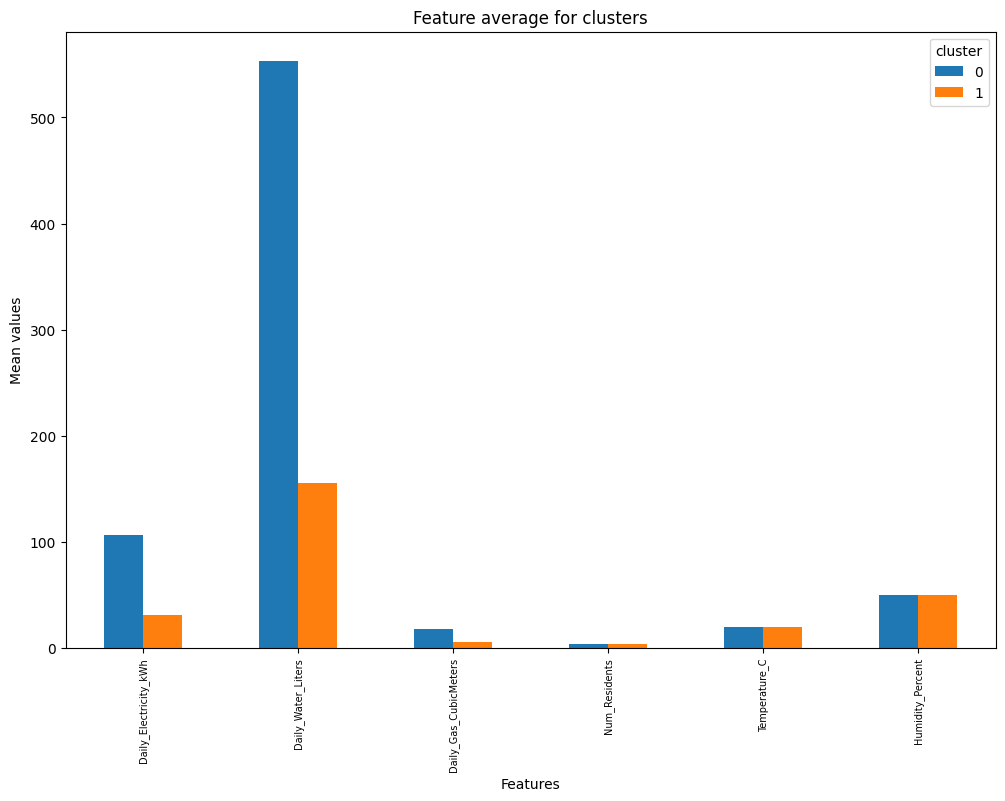

In [527]:
# Identify potential anomalous households based on extreme feature averages
Stored_cluster_mean.T.plot(kind='bar', figsize=(12,8))

plt.xticks(fontsize =7)
plt.title('Feature average for clusters')
plt.xlabel('Features')
plt.ylabel('Mean values')
plt.legend(title = 'cluster', labels = ['0', '1'])
plt.show()

Daily_Electricity_kWh and Daily_Water_Liters are two dominant features to detect suspicious consumption. As you can see, their average differs and alter by a large degree in both the cluster 0 and cluster 1 where the average of all other features are comparatively similar in both the cluster 0 and cluster 1.

# Final conclusion

Summarize the outcomes of the code developed, including a brief overview of the clustering process and the results obtained. Highlight any key findings or patterns observed after clustering the households, such as distinctive characteristics that might lead to suspicious consumption

With the help of unsupervised learning model such as KMeans clustering, the consumption patterns were analyzed, enabling us to locate suspicious consumption. The features in the dataset were scaled to enfore equal influence. The features were reduced down to 2 using principal component analysis.

The use of elbow method results in optimum cluster of 2. This optimum cluster count is used to do the k-means clustering.

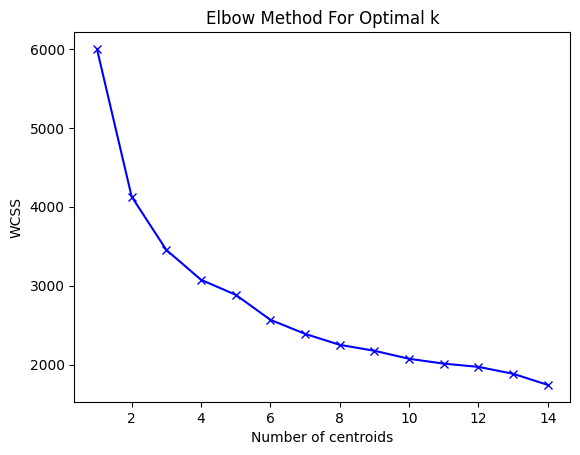

Following is the visualization of PCA components.
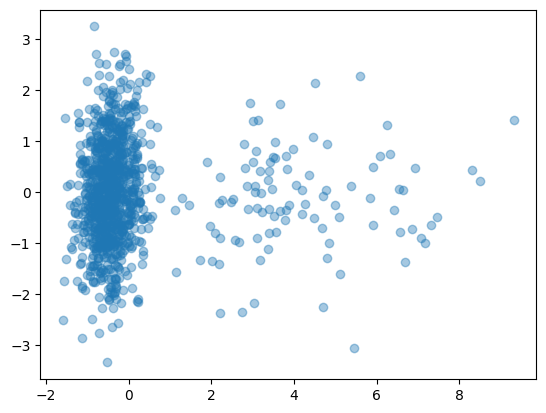

Following is the visualization of K-means clustering on PCA components.
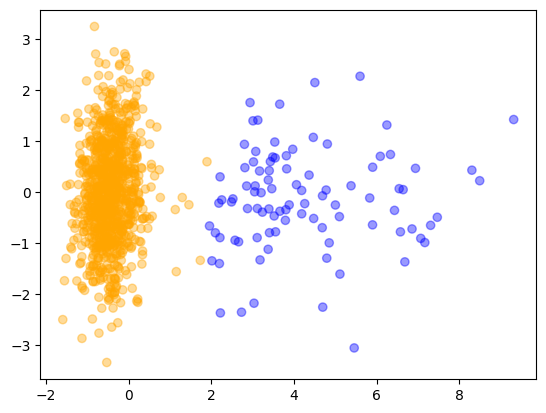

The clusters are clearly defined in the PCA components highlighted in two different colors. One cluster allegedly representing less suspicious consumption (regular) and other representing highly suspicious consumption. The cluster in blue color could be the cluster representing suspicious conusmption since the points in the clusters are more disperese. Those suspicious consumers must be consuming water and electricity at a large scale for suspicious activity (weed farming, etc) unlike the normal households. Conversely, the orange cluster must be representing non-suspicious cosumption since the cluster is concentrated around the same point. Addtionally, normal households have similar electricity, water, and gas consumption behavior.



The two most prominent features to determine suspicious consumption are daily electricity consumption and daily water consumption. This fact is backed by the bar plot of different mean value of features within clusters. Besides, these two features were also diverging a lot between two clusters.

Finally, the unsupervised learning model were able to capture any anomalies in consumption pattern with two best features to guide. 